/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:686: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  warnings.warn(


[[1316    1    2    1    1    5    6    3    4    4]
 [   0 1586    1    3    1    0    2    3    1    3]
 [   4    8 1320   11    4    4    6   11   10    2]
 [   1    1    8 1391    0   10    0    6    1   15]
 [   1    0    3    0 1240    1    2    3    1   44]
 [   1    1    0   13    2 1237   10    2    5    2]
 [   2    0    0    0    5    7 1379    0    3    0]
 [   3    5   10    3    3    1    0 1460    1   17]
 [   6    8    7   13    5   10    6    3 1281   18]
 [   6    1    0    8    8    2    0   10    6 1379]]
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.98      0.96      0.97      1380
           3       0.96      0.97      0.97      1433
           4       0.98      0.96      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.98      0.99      0.98      1396
           7       0.97      0.97   

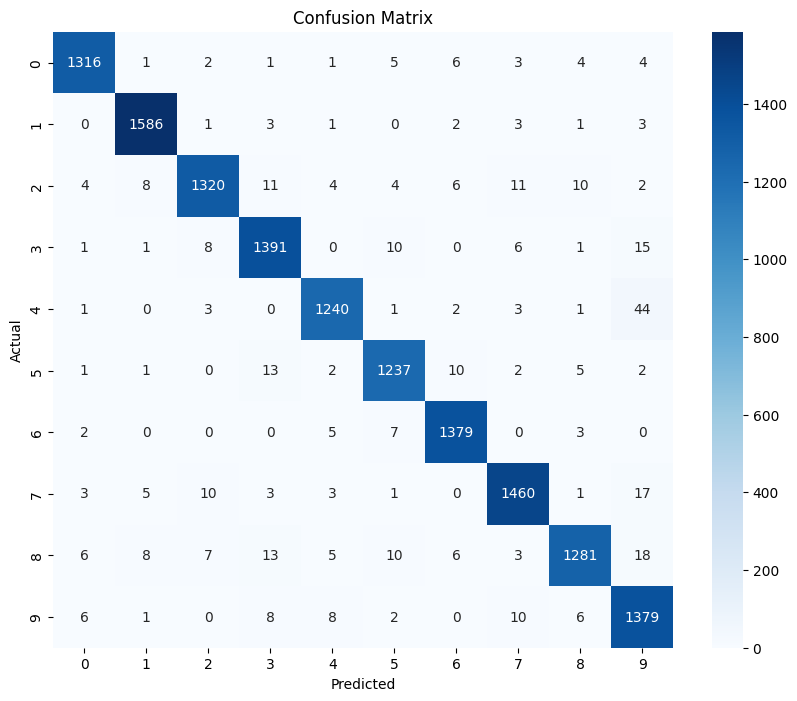

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

# Load the MNIST dataset
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
X, y = mnist.data, mnist.target.astype(int)

# Normalize pixel values to the range [0, 1]
X /= 255.0

# Split the dataset into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create an MLP model
mlp = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=10, random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Make predictions
predictions = mlp.predict(X_test)

# Evaluate the model's performance
conf_matrix = confusion_matrix(y_test, predictions)
print(conf_matrix)
print(classification_report(y_test, predictions))

# Plot the confusion matrix heatmap using seaborn
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, cmap="Blues", fmt="d")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

